#### TEAM PROJECT SUBMISSION- VERSION 1
1. AMRITA SHARMA
2. PREETHI RANGANATHAN
3. NIVEDITA VARADHARAJAN
4. YUNJIA XU


# Data Product: Income inequality in the United States

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline
%matplotlib inline
import sklearn as sk
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## CLAIM :  Income inequality in the United States has increased significantly over the years.

### Gini Index

Gini Index is one of the most popular measures of Income Inequality. 

The Gini coefficient incorporates the detailed shares data into a single statistic, which summarizes the dispersion of income across the entire income distribution. The Gini coefficient ranges from 0, indicating perfect equality (where everyone receives an equal share), to 1, perfect inequality (where only one recipient or group of recipients receives all the income). The Gini is based on the difference between the Lorenz curve (the observed cumulative income distribution) and the notion of a perfectly equal income distribution.


The dataset is from 
https://www.statista.com/statistics/219643/gini-coefficient-for-us-individuals-families-and-households/   
1. It has Gini computed for U.S. households from 1990 to 2016. Information is contained in two columns Unnamed:1, Unnamed: 2, but it has it in different data formats and there are columns and rows with redundant information. So we cleaned the data, before plotting it further.

In [71]:
Gini=pd.ExcelFile('Gini.xlsx')
Gini=pd.read_excel(Gini,'Data')

#The header is the third row and data starts from fourth row. The unnmaed column:0 is just NANs. Hence, removing it.
Gini=Gini.iloc[3:]
Gini.drop('Unnamed: 0',axis=1,inplace=True)
Gini.rename(columns={'Unnamed: 1':'Year','Unnamed: 2':'Gini_Index'}, inplace=True)
Gini.dtypes # character strings appear as object data types

# Converting Gini column to numeric 
Gini['Gini_Index']=pd.to_numeric(Gini['Gini_Index'])

#Stripping unwanted punctuations from date values and making it as proper values.
Gini['Year']=Gini['Year'].apply(lambda x : x.strip("'`"))

#Converting year into date time objects
Gini['Year']=Gini['Year'].apply(lambda x : int(x))
Gini['Year']=Gini['Year'].apply(lambda x : (1900+x) if int(x/10) ==9 else (2000+x))

File on which plot will be made to show gini trend across years.

Text(0.5,1,'Income inequality in the United States has increased significantly over the years.')

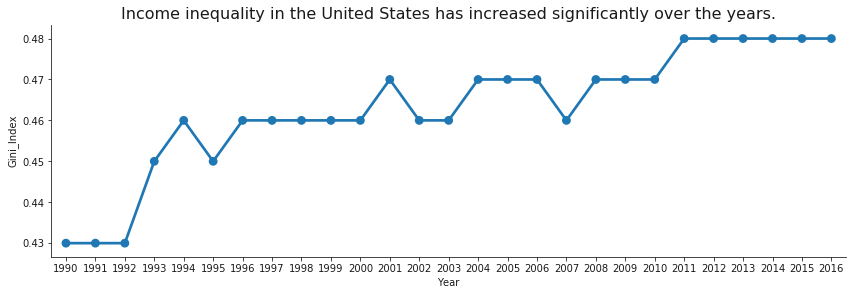

In [72]:
Gini.to_csv('Gini inequality.csv')
sns.factorplot(x='Year',y='Gini_Index',data=Gini,aspect=3)
plt.title("Income inequality in the United States has increased significantly over the years.", fontsize=16)

**The graph shows an increasing trend of Gini Index ie.,Overall income disparity has increased in the united states over the years, though the increase is not too much in the last few years.**

### The above factor can be substantiated by the fact that the Income shares for the top 1% of people is increasing, while that for the bottom 40% people has been decreasing over the years

In [73]:
comp = pd.read_excel('QuantileData.xlsx')
comp['Bottom 40 percent'] = comp['Lowest Quintile'] + comp['Second Quintile']
comp['year'] = comp['Year'].fillna(0.0).astype(int)
quantile = comp[['year','Top 1 Percent','Bottom 40 percent']]
newdf = quantile.melt('year',var_name='cols', value_name = 'vals')

Text(0.5,1,'Income shares for the top 1 people is increasing while it is decreasing for the bottom 40 percentage people in U.S')

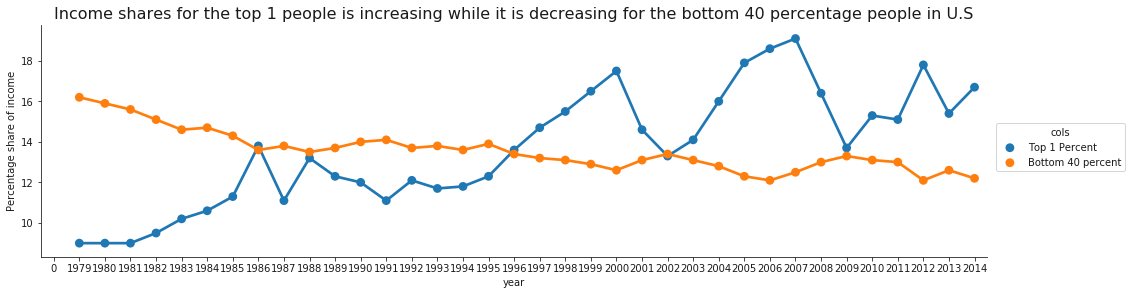

In [74]:
sns.factorplot(x = 'year', y='vals', hue = 'cols', data= newdf, aspect = 3.5)
plt.ylabel('Percentage share of income')
plt.title('Income shares for the top 1 people is increasing while it is decreasing for the bottom 40 percentage people in U.S',fontsize=16)

Dataset Source: Congressional Budget Office https://www.cbo.gov/publication/53597 Supplemental Data (single Excel file)

Documentation:
Joseph E. Stiglitz said:” The upper 1% of Americans are now taking in nearly a quarter of the nation’s income every year. The wealth rather than income, the top 1% control 40%. 25 years ago, the corresponding figures were 12% and 33%.” in his book, “The Great Divide”. Since 1970s, the share of top 1percent increases while bottom 40 percent decreases. It means that the increasing income disparity may caused by very few people took much more shares of income.

The dataset contains percentage of income contributed by lowest, second, middle, fourth, highest quintiles, 81 to 90 percentile, 91 to 95 percentile and top 1 percent of the population.

We just picked up the lowest and second quintile and top 1 percent beacuse we are concerned about the income contribution of how top 1 percent and bottom 40 percent people. 

### We wanted to further explore some of the factors that contributed to gini index:

1. Gender disparity
2. Unemployment Rate
3. Racial disparity

### (I) Exploring Income gap between Men and Women

Validity: Gender wage gaps directly contribute to income inequality, and higher gaps in labor force participation rates between men and women result in inequality of earnings between sexes, thus creating and exacerbating income inequality.
https://www.weforum.org/agenda/2015/10/why-gender-and-income-inequality-are-linked/

The dataset is from https://www.bls.gov/news.release/wkyeng.t01.htm

The data given is Gender wise median weekly earnings for each quarter. We are choosing the following columns for the explanatory data analysis:
1. Year and Quarter - Data has been summarized for each quarter in the source itself
2. Median Weekly earnings In current dollars Men. 
3. Median Weekly earnings In current dollars Women.

In [75]:
gender=pd.ExcelFile('Gender_Pay_Quarterly.xlsx')
gender=pd.read_excel(gender)

#Dropping the NA's from the data frame.
gender = gender.dropna()

#Creating a new Year column to group men and women median weekly earnings in dollars
gender['Year']=gender['Year and quarter'].apply(lambda x: x[0:4])

#Grouped by year
groupedbyYear = gender.groupby('Year')[['Median weekly earnings In current dollars Men $',\
                                        'Median weekly earnings In current dollars Women $']].mean().reset_index()

#Creating a new dataframe for men earnings seperately
men=groupedbyYear.copy()
men['category'] = 'male'
men.rename(columns = {'Median weekly earnings In current dollars Men $':'Earnings_Per_thousand'}, inplace = True)
men.drop(['Median weekly earnings In current dollars Women $'],axis=1,inplace=True)
men.head()

#Creating a new dataframe for women earnings seperately
women=groupedbyYear.copy()
women['category'] = 'female'
women.rename(columns = {'Median weekly earnings In current dollars Women $':'Earnings_Per_thousand'}, inplace = True)
women.drop(['Median weekly earnings In current dollars Men $'],axis=1,inplace=True)
women.head()

#Appending male and female dataframes to plot
final1 = men.append(women)

Text(0.5,1,"Gap between men and women's median salary has not decreased over the years")

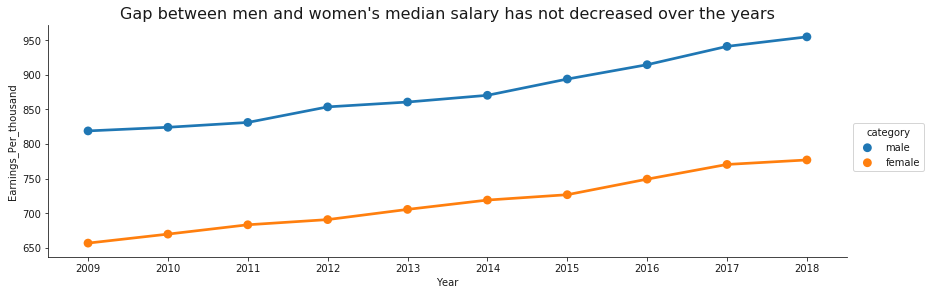

In [76]:
sns.factorplot(x = 'Year', y = 'Earnings_Per_thousand', data = final1, hue = 'category', aspect = 3)
plt.title("Gap between men and women's median salary has not decreased over the years", fontsize=16)

The graph shows that the gap between men and women's median salary has not decreased over the years. Ideally, the gap has widened a bit. This is depicted in the next plot.

Text(0.5,1,"Gap between men and women's median salary has increased over the years")

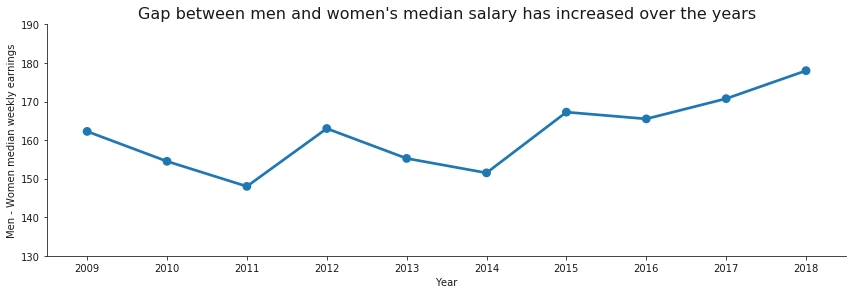

In [77]:
groupedbyYear['Men - Women median weekly earnings']=groupedbyYear['Median weekly earnings In current dollars Men $']-\
groupedbyYear['Median weekly earnings In current dollars Women $']
g=sns.factorplot(x='Year',y='Men - Women median weekly earnings',data=groupedbyYear,aspect=3)
g.set(ylim=(130, 190))
plt.title("Gap between men and women's median salary has increased over the years", fontsize=16)

**Conclusion: This gap can be one of the factors that contribute to the rising gini index.**

### (2) Exploring Correlation of Gini and Unemployment Rate within each Race

Unemployment and inequality are closely related to each other. When considered from a larger point of view, unemployment is the reason and inequality is the outcome. http://www.economywatch.com/unemployment/in-equality.html

The dataset for unemployment rate is https://www.bls.gov/charts/state-employment-and-unemployment/state-unemployment-rates-map.htm#

Here we are focussing on employment discrimination based on race in addition to total employment rate. Hence dropping men and women unemployment rate.

In [78]:
Unemp=pd.ExcelFile('Umemp.xlsx')
Unemp_race=pd.read_excel(Unemp,'Sheet3')
Unemp_race['Date']=pd.to_datetime(Unemp_race['Month'],errors='coerce')
df=Unemp_race.copy()

#Dropping the men and women unemployment rates because it is a known fact that rates will always be different.
df.drop(['Men, 20 years and over','Women, 20 years and over','16 to 19 years old','Month'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

#To group by year, picking year from the date column
df['Year']=df['Date'].apply(lambda x:int(x.year))

#Making new dataframes for each racial category and binding it together.
dfW=df.copy()
dfW['Race']='White'
dfW.drop(['Black or African American','Hispanic or Latino','Asian'],axis=1,inplace=True)
dfW.rename(columns={'White':'UnemploymentRate'},inplace=True)
dfB=df.copy()
dfB['Race']='BlackorAfricanAmerican'
dfB.drop(['Hispanic or Latino','Asian','White'],axis=1,inplace=True)
dfB.rename(columns={'Black or African American':'UnemploymentRate'},inplace=True)
dfA=df.copy()
dfA['Race']='Asian'
dfA.drop(['Black or African American','Hispanic or Latino','White'],axis=1,inplace=True)
dfA.rename(columns={'Asian':'UnemploymentRate'},inplace=True)
dfH=df.copy()
dfH['Race']='Hispanic'
dfH.drop(['Black or African American','Asian','White'],axis=1,inplace=True)
dfH.rename(columns={'Hispanic or Latino':'UnemploymentRate'},inplace=True)
dftotal=dfW.append([dfH,dfA,dfB])
dftotal=dftotal[dftotal.Year<=2016]

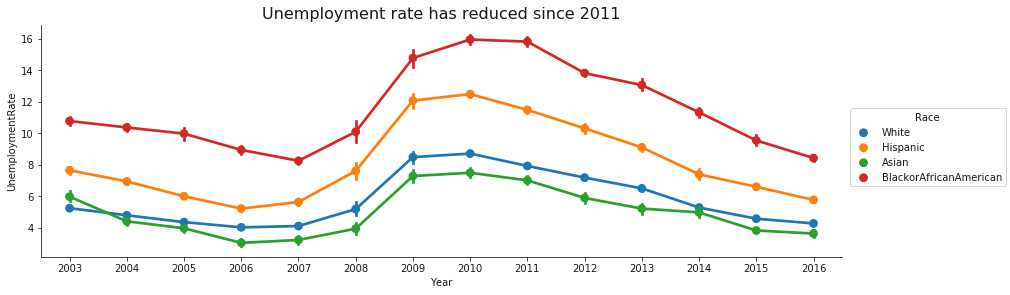

In [79]:
sns.factorplot(x='Year',y='UnemploymentRate',hue='Race',data=dftotal,aspect=3)
plt.title("Unemployment rate has reduced since 2011", fontsize=16)

Gini_cut=Gini[Gini.Year>2002]

Text(0.5,1,'Gini index reamins the same since 2011')

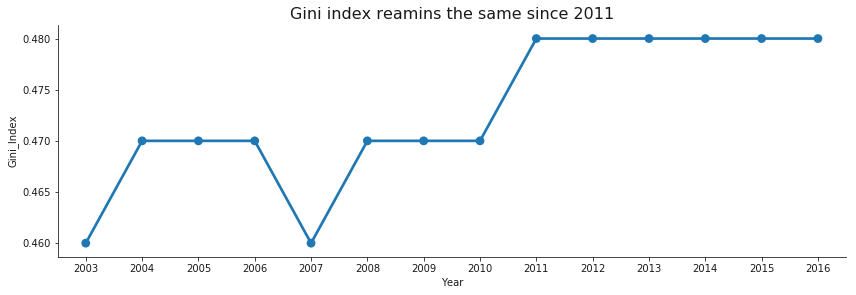

In [80]:
sns.factorplot(x='Year',y='Gini_Index',data=Gini_cut,aspect=3)
plt.title("Gini index reamins the same since 2011", fontsize=16)

Our original hypothesis was that higher unemployment rate contributes to the rise in the Gini Index. But comparing the two graphs, we can see that even if the overall unemployment rate has decreased over the years, the GINI index has not changed (ref: 2011 to 2016). 

Second hypothesis: the decreasing gap in the unemployment rates between people belonging to different races  should have a decreasing effect on the overall gini values.
But, comparing the above two graphs, we can see that even when the differences in the unemployment rate reduced (trends seen from 2011 onwards), The gini index hasnt come down correspondingly.

So, we need to find out what others factor related to unemployment rate contribute to the variation in the income inequality


### (3) Exploring GINI Indexes within each race

We tried to analyse the Gini Index changes within each race.

Source: U.S. Census Bureau, Current Population Survey, Annual Social and Economic Supplements.  For information on confidentiality protection, sampling error, nonsampling error, and definitions, see 

www2.census.gov/programs-surveys/cps/techdocs/cpsmar17.pdf 

The file contains Gini index for each race(Gini within each race) and overall gini index from 2002 to 2016.

Reading the file and converting year to numeric

In [81]:
G=pd.ExcelFile('Gini_By_Race.xls')
G1=pd.read_excel(G,'f04')
G2=G1.iloc[2:,]
G2.columns=G2.iloc[0]
GiniByRace=G2.iloc[1:72,]
GiniByRace['Year'].dtype # 
GiniByRace['Yr']=GiniByRace['Year'].apply(str)
GiniByRace['Yr2']=GiniByRace['Yr'].apply(lambda x: x[0:4])
GiniByRace['Yr2']=pd.to_numeric(GiniByRace['Yr2'])
GiniByRace.head()

#Picking only the required columns and selecting values greater than 2002.
GiniByRace=GiniByRace[['Yr2','Total','White\nAlone, Not\nHispanic','Black\nAlone','Asian\nAlone'\
                       ,'Hispanic\n(any\nrace)']]
GiniByRace.rename(columns={'White\nAlone, Not\nHispanic':'White','Black\nAlone':'Black'\
                           ,'Asian\nAlone':'Asian','Hispanic\n(any\nrace)':'Hispanic','Yr2':'Year'},inplace=True)
GiniByRace=GiniByRace[GiniByRace.Year>=2002]
GiniByRace=GiniByRace.apply(pd.to_numeric)
GiniByRace.dtypes
GiniByRace=GiniByRace.groupby('Year')['Total','White','Black','Asian','Hispanic'].mean()
GiniByRace=GiniByRace.reset_index()
GiniByRace=GiniByRace.rename(columns={'Total':'All_Races'})

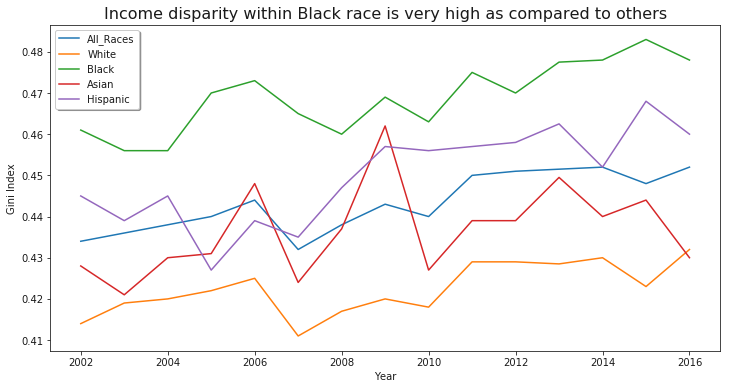

In [82]:
GiniByRace.plot(x="Year", y=["All_Races", "White", "Black","Asian","Hispanic"],kind="line",figsize =(12,6),label="Race")
plt.title("Income disparity within Black race is very high as compared to others", fontsize=16)
plt.ylabel('Gini Index')
plt.legend(("All_Races", "White", "Black","Asian","Hispanic"), shadow=True)

This graph shows that there is a general difference in the gini index for each race. for e.g. in the above graph, we can see that the income disparity in Black Race is a lot higher (within their group) as compared to the others. 
Overall, gini indexes is relatively high within Black and Hispanic races and low within Asian and White races.

Note: There is a general rise in the gini indexes over years.

Based on all the above findings, we tried to test the claim that there is income disparity between races.

## CLAIM : Income disparity between men and women is not a myth. There is income disparity between men and women irrespective of the races

Dataset Sources:

https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/09/Wage-Gap-State-By-State-2017.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Black-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Latina-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Latina-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2015/12/Native-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2017/03/Asian-Women-State-by-State-2018.pdf
https://nwlc-ciw49tixgw5lbab.stackpathdns.com/wp-content/uploads/2016/04/White-Women-State-by-State-2018.pdf

The dataset contains median wages for men and women for each state and state-wise median wages for women of each race and for White men. 

## Concept of Median Wages Distribution

Read the files for each race and merged it together.

In [83]:
MedWag=pd.ExcelFile('MedianWagesDistribution.xlsx')
BWandWM=pd.read_excel(MedWag,'BlackWomenWhiteMen')
LW=pd.read_excel(MedWag,'LatinaWomen')
NW=pd.read_excel(MedWag,'NativeWomen')
AW=pd.read_excel(MedWag,'AsianWomen')
WW=pd.read_excel(MedWag,'WhiteWomen')
MW=pd.read_excel(MedWag,'MenWomen')
MedWag1=BWandWM.merge(LW)
MedWag2=MedWag1.merge(NW)
MedWag3=MedWag2.merge(AW)
MedWag4=MedWag3.merge(WW)
MedWag5=MedWag4.merge(MW)

Text(0.5,1,'Median Income disparity exists between men and women.')

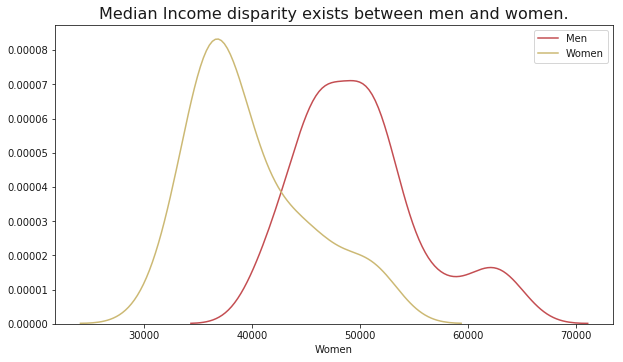

In [84]:
#Distribution of wages of men and women, in general
sns.set_color_codes()
a4_dims = (10, 5.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(MedWag5.Men, label='Men', hist=False, color="r")
sns.distplot(MedWag5.Women, label='Women', hist=False, color="y")
plt.title("Median Income disparity exists between men and women.", fontsize=16)

Here, we see that the median income distribution of women is quite to the left as compared to men, which clearly indicates that there is gender income disparity.
This contributes to the overall disparity in the Gini Index

## CLAIM : Racial Income disparity gaps persist in U.S

We used the same dataset we used for gender disparity.

Text(0.5,1,'Racial Income disparity gaps persist in U.S')

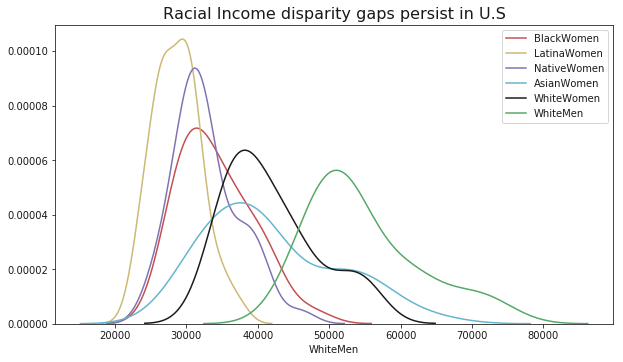

In [85]:
sns.set_color_codes()
a4_dims = (10, 5.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(MedWag5.BlackWomen, label='BlackWomen', hist=False, color="r")
sns.distplot(MedWag5.LatinaWomen, label='LatinaWomen', hist=False, color="y")
sns.distplot(MedWag5.NativeWomen, label='NativeWomen', hist=False, color="m")
sns.distplot(MedWag5.AsianWomen, label='AsianWomen', hist=False, color="c")
sns.distplot(MedWag5.WhiteWomen, label='WhiteWomen', hist=False, color="k")
sns.distplot(MedWag5.WhiteMen, label='WhiteMen', hist=False, color="g");
plt.title('Racial Income disparity gaps persist in U.S',fontsize=16)

From this graph, we can see that the distribution of latina women is on the left,and the distribution of white women is on the right as compared to other women.
1. Latina women, native women and black women have relatively lesser median wages as compared to asian and white women.
2. White men has a higher mean median wage as compared to all women irrespective of races.This is in accordance with our previous claim.

Hence we can conclude that there is racial income inequality in the US.

The findings of this graph is in sync with our explorations of gini index within each race where we found that gini indexes is relatively high within Black and Hispanic races and low within Asian and White races.